# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [25]:
# Import warnings
import warnings
# warnings.filterwarnings('ignore')

In [1]:
# Import the libraries you will be using for analysis
!pip install numpy==1.26.4
!pip install pandas==2.2.2
!pip install matplotlib==3.10.0
!pip install seaborn==0.13.2


   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.6 MB 1.2 MB/s eta 0:00:10
   - -------------------------------------- 0.4/11.6 MB 3.2 MB/s eta 0:00:04
   -- ------------------------------------- 0.7/11.6 MB 4.5 MB/s eta 0:00:03
   --- ------------------------------------ 1.1/11.6 MB 5.3 MB/s eta 0:00:02
   ----- ---------------------------------- 1.5/11.6 MB 6.1 MB/s eta 0:00:02
   ------ --------------------------------- 2.0/11.6 MB 7.0 MB/s eta 0:00:02
   -------- ------------------------------- 2.5/11.6 MB 7.4 MB/s eta 0:00:02
   ---------- ----------------------------- 3.1/11.6 MB 8.0 MB/s eta 0:00:02
   ------------- -------------------------- 3.8/11.6 MB 8.8 MB/s eta 0:00:01
   ------------- -------------------------- 4.0/11.6 MB 8.2 MB/s eta 0:00:01
   -------------- ------------------------- 4.1/11.6 MB 8.0 MB/s eta 0:00:01
   ----------

In [6]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns


# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [9]:
# Try loading one file

df = pd.read_parquet(r'C:\Users\Thomas Purackal\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records\2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [35]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
directory_path=r'C:\Users\Thomas Purackal\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records'
os.chdir(directory_path)

# list of all the twelve files to read
file_list = os.listdir()

# initialise a dataframe
df = pd.DataFrame()

sampled_data_list=[]

# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)
        # Reading the current file
        data=pd.read_parquet(file_path)
        data['tpep_pickup_datetime']=pd.to_datetime(data['tpep_pickup_datetime'])
        #add a column to extract the date and hour.
        data['date'] = data['tpep_pickup_datetime'].dt.date  # Extract date part
        data['hour'] = data['tpep_pickup_datetime'].dt.hour  # Extract hour
        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final df.
        # Sampled_data = pd.DataFrame()
        file_sampled_data = []
        # Loop through dates and then loop through every hour of each date
        for date in data['date'].unique():
            daily_data=data[data['date']==date]
            # Iterate through each hour of the selected date
            for hour in daily_data['hour'].unique():
                hourly_data=daily_data[daily_data['hour']==hour]
                # Sample 5% of the hourly data randomly
                sampled_hourly_data = hourly_data.sample(frac=0.05, random_state=42)
                # Add data of this hour to the df.
                file_sampled_data.append(sampled_hourly_data)
        # combine the sampled data of all the dates into a single df.
        file_sampled_data = pd.concat(file_sampled_data, ignore_index=True)
        sampled_data_list.append(file_sampled_data)
    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

final_sampled_data1.head()
final_sampled_data1.info()
# final_sampled_data1.columns()
final_sampled_data1 = pd.concat(sampled_data_list, ignore_index=True)
final_sampled_data1.to_parquet('sampled_taxi_data.parquet', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet
# df.to_parquet('')
# Already performing this in the above cell. Also please note I will be saving the DF in between the scripts as a check point.

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [39]:
# Load the new data file
df1=pd.read_parquet(r'C:\Users\Thomas Purackal\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records\sampled_taxi_data.parquet')

In [45]:
# df1.head()
#after sampling - number of rows is 1991327 
df1.shape[0]

1991327

In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991327 entries, 0 to 1991326
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [49]:
# Fix the index and drop any columns that are not needed
df1.reset_index(drop=True,inplace=True)
pd.set_option('display.max_columns',None)
display(df1)
#Dropping the column 'Extra' which is not needed in any of the analysis.


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1               2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2               2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3               2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4               2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
...           ...                  ...                   ...              ...   
1991322         1  2023-09-29 23:01:16   2023-09-29 23:06:29              1.0   
1991323         2  2023-09-29 23:39:12   2023-09-29 23:55:07              5.0   
1991324         2  2023-09-29 23:57:02   2023-09-30 00:14:50              1.0   
1991325         1  2023-09-29 23:50:56   2023-09-29 23:51:24              NaN   
1991326         1  2023-09-29 23:32:59   2023-09-29 23:41:22              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 7.74         1.0                  N           138   
1                 1.24         1.0                  N           161   
2                 1.44         1.0                  N           237   
3                 0.54         1.0                  N           143   
4                19.24         NaN               None            66   
...                ...         ...                ...           ...   
1991322           0.50         1.0                  N           211   
1991323           3.32         1.0                  N           249   
1991324          10.19         1.0                  N           138   
1991325           0.00         NaN               None           144   
1991326           1.20         1.0                  N           148   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
0                 256             2        32.40    6.0      0.5        0.00   
1                 237             1         7.90    1.0      0.5        2.58   
2                 141             2        11.40    1.0      0.5        0.00   
3                 142             2         6.50    1.0      0.5        0.00   
4                 107             0        25.64    0.0      0.5        5.93   
...               ...           ...          ...    ...      ...         ...   
1991322           249             2         6.50    3.5      0.5        0.00   
1991323            48             1        18.40    1.0      0.5        4.68   
1991324           263             1        39.40    6.0      0.5       10.46   
1991325           144             0        22.28    0.0      0.5        0.00   
1991326           231             1        10.00    3.5      0.5        3.00   

         tolls_amount  improvement_surcharge  total_amount  \
0                0.00                    1.0         41.15   
1                0.00                    1.0         15.48   
2                0.00                    1.0         16.40   
3                0.00                    1.0         11.50   
4                0.00                    1.0         35.57   
...               ...                    ...           ...   
1991322          0.00                    1.0         11.50   
1991323          0.00                    1.0         28.08   
1991324          6.94                    1.0         68.55   
1991325          0.00                    1.0         26.28   
1991326          0.00                    1.0         18.00   

         congestion_surcharge  airport_fee        date  hour  Airport_fee  
0                         0.0         1.25  2023-01-01     0          NaN  
1                         2.5         0.00  2023-01-01     0          NaN  
2                         2.5         0.00  2023-01-01     0          NaN  
3                         2.5         0.00  2023-01-01     0          NaN  
4                         NaN          NaN  2023-01-01     0          NaN  
...                  

In [52]:
df1=df1.drop(columns=['extra'])

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [50]:
# Combine the two airport fee columns
df1['Airport__Fee'] = df1['airport_fee'].combine_first(df1['Airport_fee'])
#dropping the old columns
df1=df1.drop(columns=['airport_fee','Airport_fee'])

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [54]:
# check where values of fare amount are negative
columns_with_numeric=df1.select_dtypes(exclude=['object','datetime64']).columns
columns_with_neg_values=columns_with_numeric[(df1[columns_with_numeric] < 0).any()].tolist()
print("Columns with negative values : \n", columns_with_neg_values)

Columns with negative values : 
 ['mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport__Fee']


In [56]:
# Columns with negative values : ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport__Fee']
# looking at the distribution of negative values.
for c in columns_with_neg_values :
  print("no of -ve values in column "+c+" : "+str(df1[df1[c]<0].shape[0]))

no of -ve values in column mta_tax : 82
no of -ve values in column improvement_surcharge : 87
no of -ve values in column total_amount : 87
no of -ve values in column congestion_surcharge : 62
no of -ve values in column Airport__Fee : 17


Did you notice something different in the `RatecodeID` column for above records?

In [59]:
# Analyse RatecodeID for the negative fare amounts
df1[df1['RatecodeID']<0].shape[0]

0

In [63]:
#Checking the column RatecodeID for Null values.
df1[df1['RatecodeID'].isnull()].shape[0]
#These records doesnt make sense as the rate card cannot be empty in a normal case, hence removing them
df1=df1[~(df1['RatecodeID'].isnull())]

In [64]:
# fix these negative values
#Removing the negative values.
for colm in columns_with_neg_values :
  df1=df1[~(df1[colm]<0)]
# All the rows with negative values has been removed. 

In [65]:
#saving the preprocessed file
df1.to_parquet('df_columns_fixed.parquet', index=False)

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [74]:
# Find the proportion of missing values in each column
# df[df1.isnull()].shape()
print(str(df.isna().mean() * 100)


VendorID                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
store_and_fwd_flag       0.0
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
congestion_surcharge     0.0
date                     0.0
hour                     0.0
Airport__Fee             0.0
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [83]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
# str(df1[df1['passenger_count'].isnull()].shape[0])
print('number of rows with value 0 for column passenger_count :   '+str(df1[df1['passenger_count']==0 | df1['passenger_count'].isnull()].shape[0]))
df1=df1[~(df1['passenger_count']==0)]
df1=df1[~(df1['passenger_count'].isnull())]
df1.shape[0]

number of rows with value 0 for column passenger_count :   0


1891874

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [84]:
# Fix missing values in 'RatecodeID'
print('number of rows with RatecodeID as null: '+str(df1[df1['RatecodeID'].isnull()].shape[0]))
#The count of this would be null as this was already fixed previously in the script.

number of rows with RatecodeID as null: 0


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [85]:
# handle null values in congestion_surcharge
print('number of rows with congestion_surcharge as null: '+str(df1[df1['congestion_surcharge'].isnull()].shape[0]))

number of rows with congestion_surcharge as null: 0


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [88]:
# Handle any remaining missing values
print('are there any more missing values in the dataframe.',str(df.isna().any().any()))

are there any more missing values in the dataframe. False


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

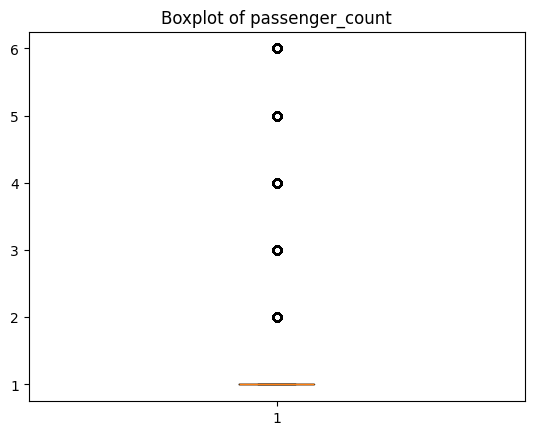

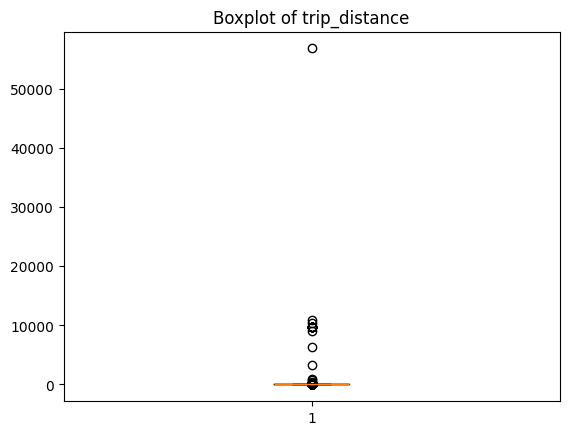

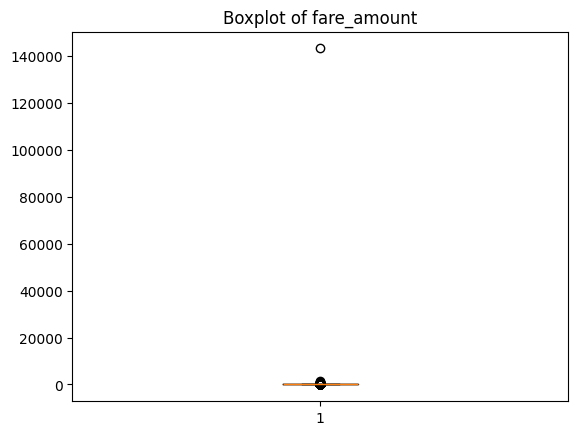

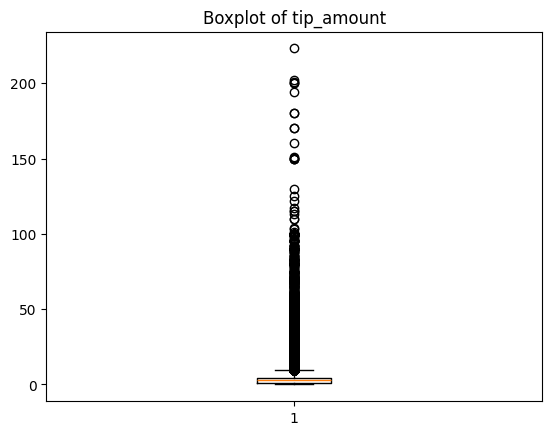

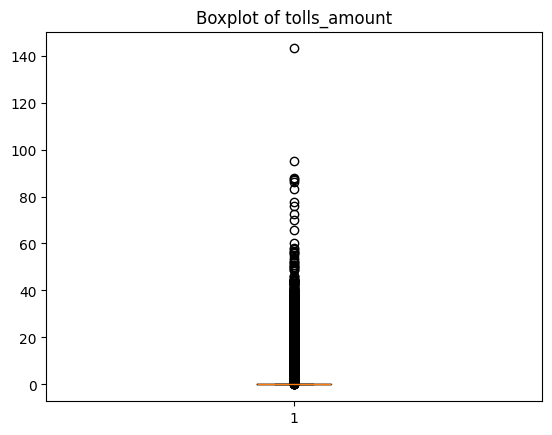

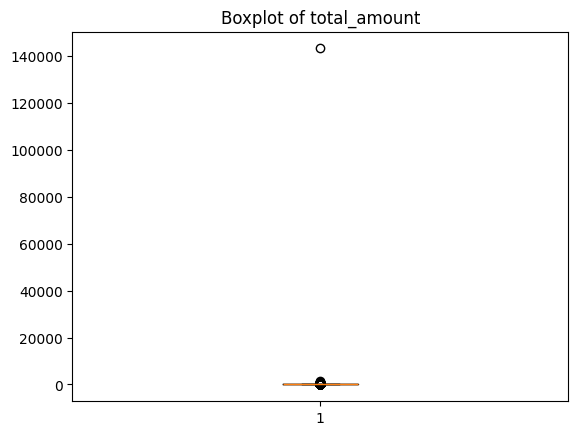

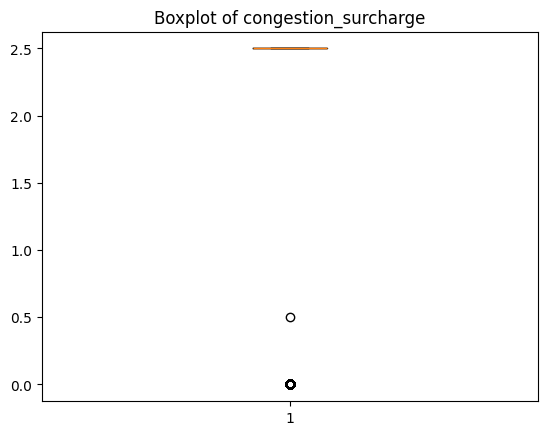

In [96]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
# To check for outliers I have created a box plot for all the continous columns  

# import matplotlib.pyplot as plt

# plt.boxplot(df['A'])
# plt.title("Boxplot of Column A")
# plt.show()
# column_names = df1.columns
# print(column_names)

column_names = ['passenger_count', 'trip_distance', 'fare_amount', 'tip_amount', 'tolls_amount', 'total_amount', 'congestion_surcharge']

for column in column_names:
    plt.boxplot(df1[column])
    plt.title(f"Boxplot of {column}")
    plt.show()


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [116]:
#Writing the file before cleaning the file.
# file_sampled_data.to_parquet('df_checkpoint1.parquet', index=False)
df2 = pd.read_parquet('df_checkpoint1.parquet')

In [114]:
# remove passenger_count > 6
df2=df2[~(df2['passenger_count']>6)]

In [118]:
# Continue with outlier handling
#From the above visual it can be understood that the one with fare amount above 200 is a rare occurrence so it can be considered as an outlier
df2=df2[df2['fare_amount']<=200]

#Removing the rows with trip distance as 0. 
df2=df2[~(df2['trip_distance']==0)]

#Removing the records with payment type as 0.
df2=df2[~(df2['payment_type']==0)]

df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90530 entries, 0 to 94926
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               90530 non-null  int64         
 1   tpep_pickup_datetime   90530 non-null  datetime64[us]
 2   tpep_dropoff_datetime  90530 non-null  datetime64[us]
 3   passenger_count        90530 non-null  float64       
 4   trip_distance          90530 non-null  float64       
 5   RatecodeID             90530 non-null  float64       
 6   store_and_fwd_flag     90530 non-null  object        
 7   PULocationID           90530 non-null  int64         
 8   DOLocationID           90530 non-null  int64         
 9   payment_type           90530 non-null  int64         
 10  fare_amount            90530 non-null  float64       
 11  extra                  90530 non-null  float64       
 12  mta_tax                90530 non-null  float64       
 13  tip_am

In [119]:
# Do any columns need standardising?
# display(df2['trip_distance'].unique())

df2.sample(10)



VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
82117         1  2023-07-07 10:38:21   2023-07-07 11:05:14              1.0   
62424         2  2023-02-18 16:48:46   2023-02-18 17:06:21              2.0   
6713          2  2023-01-28 13:07:01   2023-01-28 13:13:45              1.0   
48856         2  2023-06-23 13:08:58   2023-06-23 13:14:49              1.0   
70209         1  2023-04-20 16:30:26   2023-04-20 16:46:48              2.0   
43808         1  2023-06-05 13:30:31   2023-06-05 13:42:59              2.0   
68999         2  2023-04-14 15:35:00   2023-04-14 15:45:31              2.0   
14769         2  2023-10-25 17:13:59   2023-10-25 17:59:28              2.0   
26664         1  2023-12-07 07:29:55   2023-12-07 07:32:59              1.0   
17444         2  2023-11-03 17:04:44   2023-11-03 17:11:30              3.0   

       trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
82117           5.30         1.0                  N           137   
62424           2.30         1.0                  N            79   
6713            1.58         1.0                  N           234   
48856           0.68         1.0                  N           142   
70209           1.90         1.0                  N           249   
43808           1.50         1.0                  N           164   
68999           1.16         1.0                  N           158   
14769          17.02         2.0                  N           132   
26664           0.60         1.0                  N           161   
17444           0.69         1.0                  N           141   

       DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
82117             7             1         28.2    2.5      0.5        3.00   
62424           158             1         17.7    0.0      0.5        4.34   
6713            233             1          9.3    0.0      0.5        1.00   
48856           163             2          7.2    0.0      0.5        0.00   
70209           231             1         12.8    5.0      0.5        3.85   
43808           229             2         10.7    2.5      0.5        0.00   
68999           113             2         10.7    0.0      0.5        0.00   
14769           170             1         70.0    5.0      0.5       17.19   
26664           162             1          5.8    2.5      0.5        1.96   
17444           162             1          7.9    2.5      0.5        2.88   

       tolls_amount  improvement_surcharge  total_amount  \
82117          0.00                    1.0         35.20   
62424          0.00                    1.0         26.04   
6713           0.00                    1.0         14.30   
48856          0.00                    1.0         11.20   
70209          0.00                    1.0         23.15   
43808          0.00                    1.0         14.70   
68999          0.00                    1.0         14.70   
14769          6.94                    1.0        104.88   
26664          0.00                    1.0         11.76   
17444          0.00                    1.0         17.28   

       congestion_surcharge  airport_fee        date  hour  Airport_fee  
82117                   2.5          NaN  2023-07-07    10         0.00  
62424                   2.5          NaN  2023-02-18    16         0.00  
6713                    2.5          0.0  2023-01-28    13          NaN  
48856                   2.5          NaN  2023-06-23    13         0.00  
70209                   2.5          NaN  2023-04-20    16         0.00  
43808                   2.5          NaN  2023-06-05    13         0.00  
68999                   2.5          NaN  2023-04-14    15         0.00  
14769                   2.5          NaN  2023-10-25    17         1.75  
26664                   2.5          NaN  2023-12-07     7         0.00  
17444                   2.5          NaN  2023-11-03    17         0.00

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [ ]:
df.columns.tolist()

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

    hour  pickup_count
0      0          2533
1      1          1685
2      2          1123
3      3           747
4      4           498
5      5           514
6      6          1199
7      7          2431
8      8          3358
9      9          3854
10    10          4232
11    11          4578
12    12          4994
13    13          5129
14    14          5505
15    15          5657
16    16          5632
17    17          6095
18    18          6383
19    19          5739
20    20          5111
21    21          5092
22    22          4718
23    23          3723


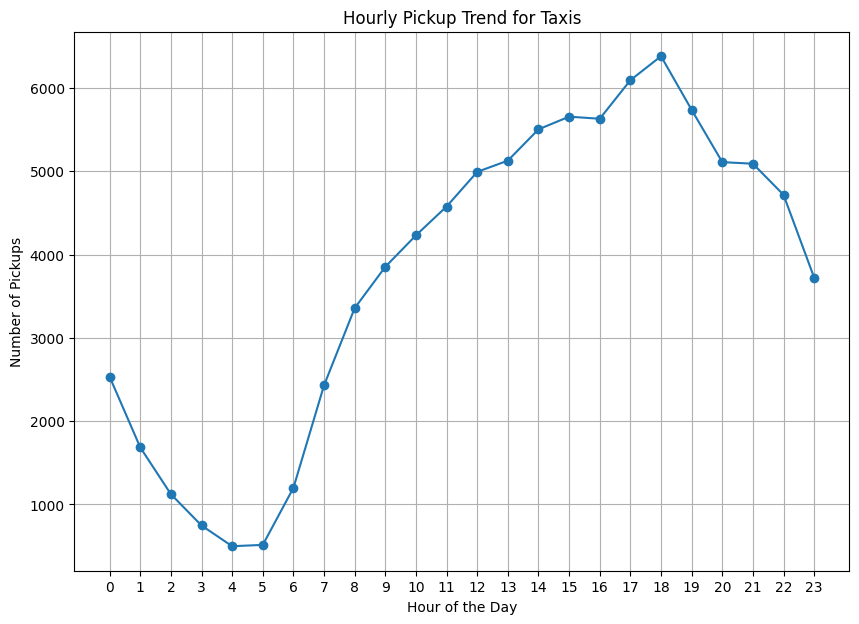

In [122]:
# Find and show the hourly trends in taxi pickups
hourly_pickups = df2.groupby('hour').size().reset_index(name='pickup_count')
print(hourly_pickups)

plt.figure(figsize=(10, 7))
plt.plot(hourly_pickups['hour'], hourly_pickups['pickup_count'], marker='o', linestyle='-')
plt.title('Hourly Pickup Trend for Taxis')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(24))
plt.grid(True)
plt.show()

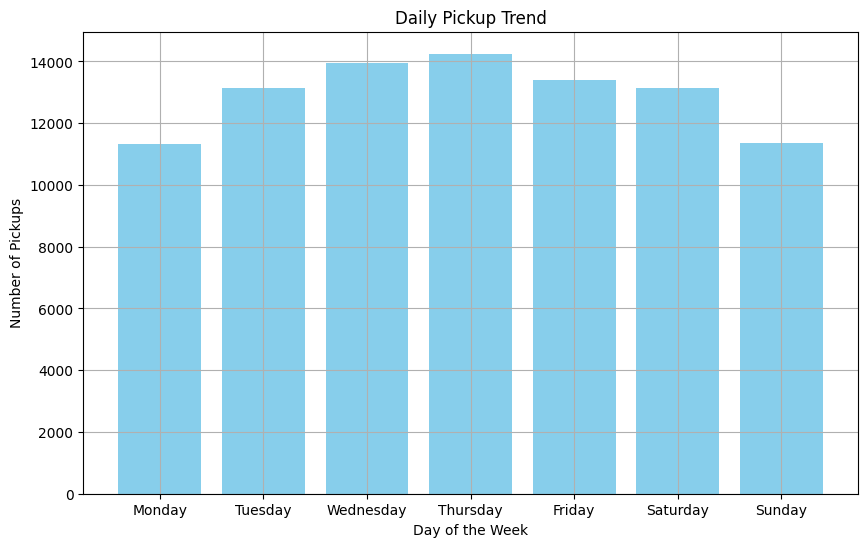

In [124]:
# Find and show the daily trends in taxi pickups (days of the week)
# lets add one column for week_Day
df2['week_Day']=df2['tpep_pickup_datetime'].dt.dayofweek

map_days_dict = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df2['day_name'] = df2['week_Day'].map(map_days_dict)
daily_pickups = df2.groupby('day_name').size().reindex(map_days_dict.values()).reset_index(name='pickup_count')
plt.figure(figsize=(10, 6))
plt.bar(daily_pickups['day_name'], daily_pickups['pickup_count'], color='skyblue')
plt.title('Daily Pickup Trend')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.grid(True)
plt.show()


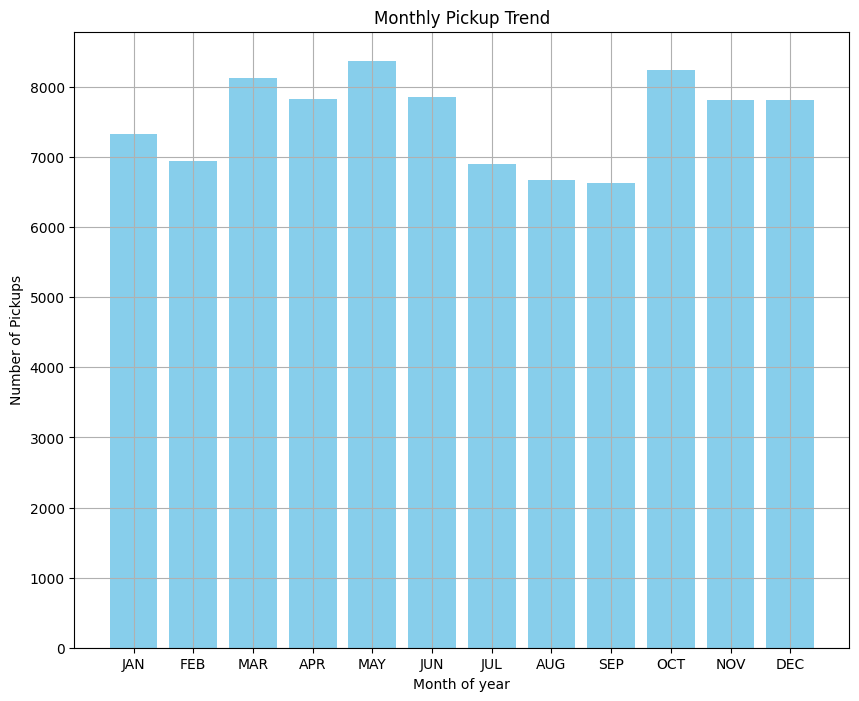

In [126]:
# Show the monthly trends in pickups
df2['Month']=df2['tpep_pickup_datetime'].dt.month
months_map = {1: 'JAN', 2: 'FEB', 3: 'MAR', 4: 'APR', 5: 'MAY', 6: 'JUN', 7: 'JUL', 8: 'AUG', 9: 'SEP', 10: 'OCT', 11: 'NOV', 12: 'DEC' }
df2['Month_name']=df2['Month'].map(months_map)
monthly_trend=df2.groupby('Month_name').size().reindex(months_map.values()).reset_index(name='pickup_count')
plt.figure(figsize=(10, 8))
plt.bar(monthly_trend['Month_name'], monthly_trend['pickup_count'], color='skyblue')
plt.title('Monthly Pickup Trend')
plt.xlabel('Month of year')
plt.ylabel('Number of Pickups')
plt.grid(True)
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [128]:
# Analyse the above parameters
print('now of rows with fare_amount=0'+str(df2[df2['fare_amount']<=0].shape[0]))
print('now of rows with total_amount=0'+str(df2[df2['total_amount']<=0].shape[0]))
print('now of rows with tip_amount=0'+str(df2[df2['tip_amount']<=0].shape[0]))
print('now of rows with trip_distance=0'+str(df2[df2['trip_distance']<=0].shape[0]))


now of rows with fare_amount=016
now of rows with total_amount=012
now of rows with tip_amount=019886
now of rows with trip_distance=00


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [130]:
# Create a df with non zero entries for the selected parameters.
df3 = df2[df2['fare_amount']>0]
df3 = df3[df3['total_amount']>0]
df3 = df3[df3['tip_amount']>0]
#I have already removed the records with no distances.


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

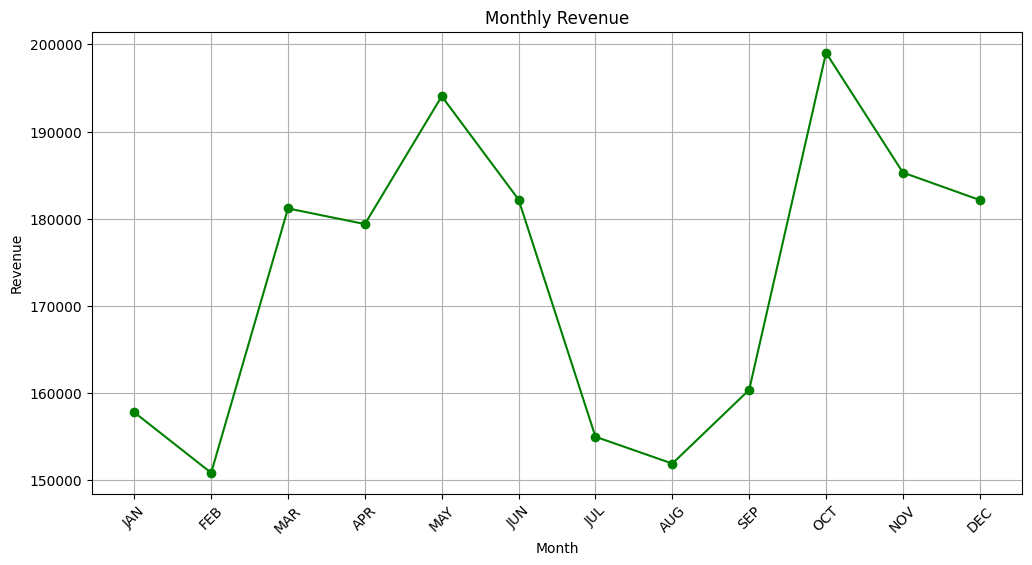

In [133]:
# Group data by month and analyse monthly revenue
monthly_revenue = df3.groupby('Month_name')['total_amount'].sum().reindex(months_map.values()).reset_index()
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue['Month_name'], monthly_revenue['total_amount'], marker='o', linestyle='-', color='green')
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

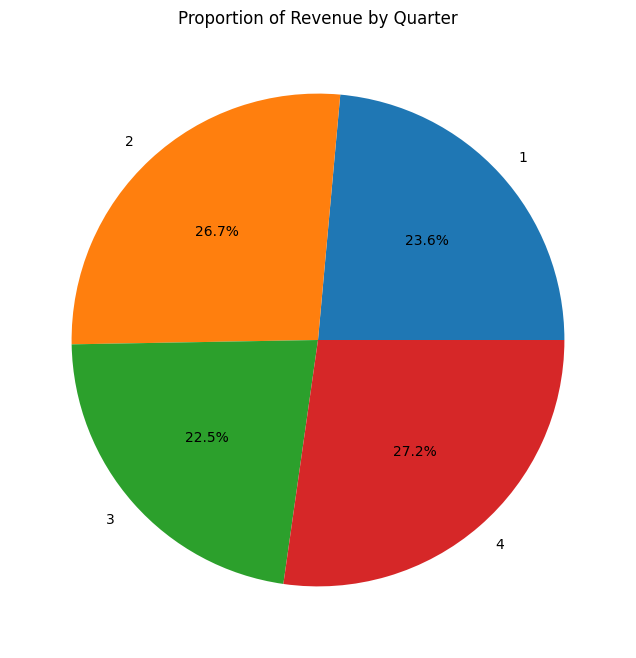

In [139]:
# Calculate proportion of each quarter
df3['quarter_plot']=df3['tpep_pickup_datetime'].dt.quarter
quarter_revenue = df3.groupby('quarter_plot')['total_amount'].sum().reset_index()
total_revenue = quarter_revenue['total_amount'].sum()
quarter_revenue['proportion'] = (quarter_revenue['total_amount'] / total_revenue) * 100
#print(quarter_revenue)
plt.figure(figsize=(8, 8))
plt.pie(quarter_revenue['proportion'], labels=quarter_revenue['quarter_plot'], autopct='%1.1f%%')
plt.title('Proportion of Revenue by Quarter')
plt.show()


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

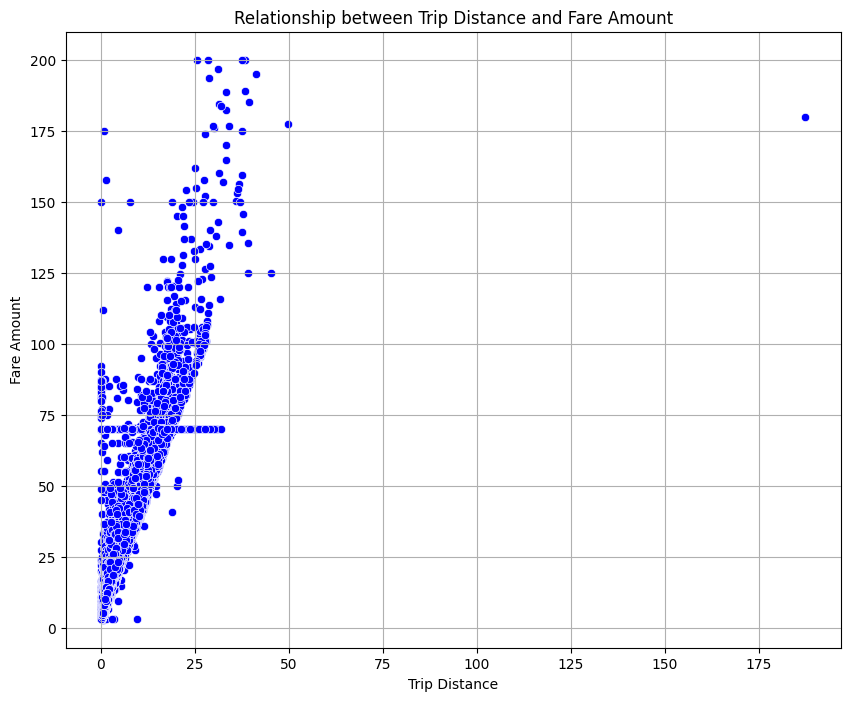

Correlation between Trip Distance and Fare Amount: 0.94


In [141]:
# Show how trip fare is affected by distance

plt.figure(figsize=(10, 8))
sns.scatterplot(x='trip_distance', y='fare_amount', data=df3, color='blue')
plt.title('Relationship between Trip Distance and Fare Amount')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.grid(True)
plt.show()

#Calculate the correlation value
correlation = df3['trip_distance'].corr(df3['fare_amount'])
print(f"Correlation between Trip Distance and Fare Amount: {correlation:.2f}")


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

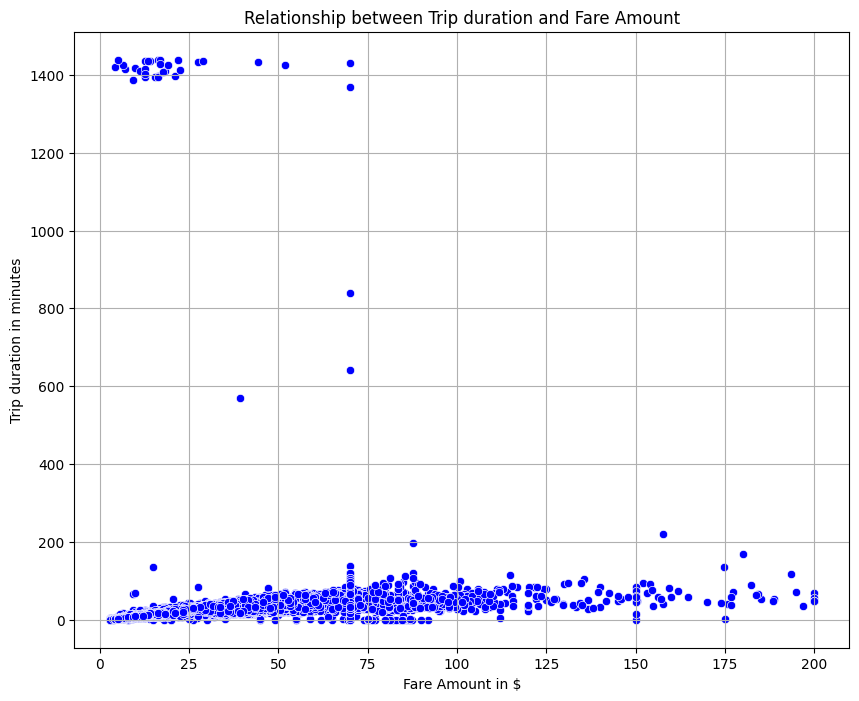

Correlation between fare Amount and trip_duration: 0.34


In [144]:
# Show relationship between fare and trip duration
df3['trip_duration'] = (df3['tpep_dropoff_datetime'] - df3['tpep_pickup_datetime']).dt.total_seconds() / 60
plt.figure(figsize=(10, 8))
sns.scatterplot(x='fare_amount', y='trip_duration', data=df3, color='blue')
plt.title('Relationship between Trip duration and Fare Amount')
plt.xlabel('Fare Amount in $')
plt.ylabel('Trip duration in minutes')
plt.grid(True)
plt.show()
#Calculate the correlation value
correlation = df3['fare_amount'].corr(df3['trip_duration'])
print(f"Correlation between fare Amount and trip_duration: {correlation:.2f}")

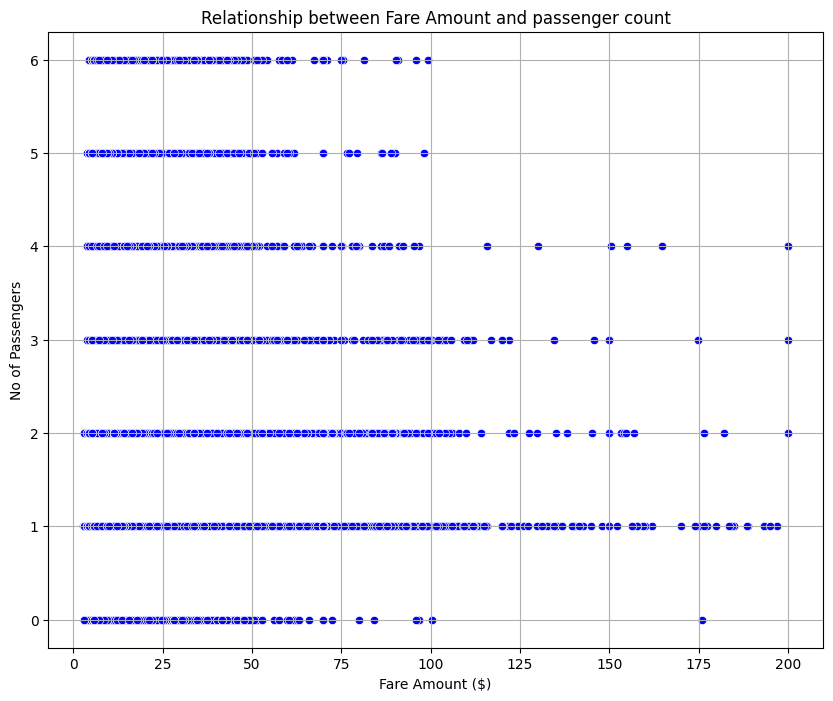

Correlation between fare Amount and No of passengers : 0.04


In [145]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(10, 8))
sns.scatterplot(x='fare_amount', y='passenger_count', data=df3, color='blue')
plt.title('Relationship between Fare Amount and passenger count')
plt.xlabel('Fare Amount ($)')
plt.ylabel('No of Passengers')
plt.grid(True)
plt.show()
#Calculate the correlation value
correlation = df3['fare_amount'].corr(df3['passenger_count'])
print(f"Correlation between fare Amount and No of passengers : {correlation:.2f}")

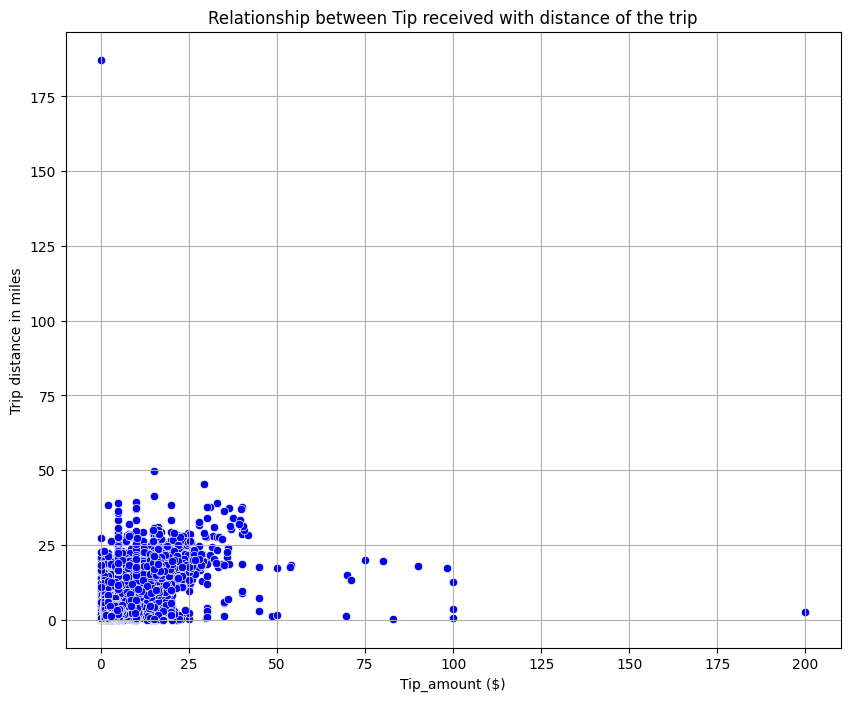

Correlation between Tip Amount and trip_distance : 0.77


In [146]:
# Show relationship between tip and trip distance
plt.figure(figsize=(10, 8))
sns.scatterplot(x='tip_amount', y='trip_distance', data=df3, color='blue')
plt.title('Relationship between Tip received with distance of the trip')
plt.xlabel('Tip_amount ($)')
plt.ylabel('Trip distance in miles')
plt.grid(True)
plt.show()
#Calculate the correlation value
correlation = df3['tip_amount'].corr(df3['trip_distance'])
print(f"Correlation between Tip Amount and trip_distance : {correlation:.2f}")


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

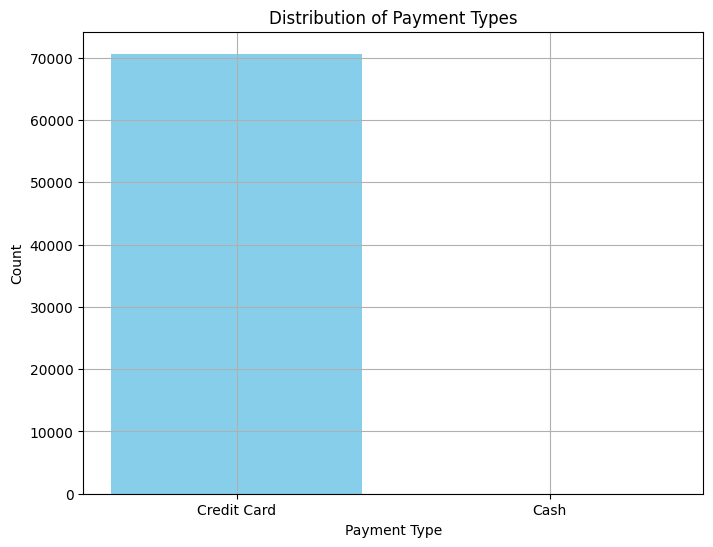

In [147]:
# Analyse the distribution of different payment types (payment_type).
Payment_name = {1: 'Credit Card',2: 'Cash',3: 'No Charge',4: 'Dispute'}
df3['Payment_type_name'] = df3['payment_type'].map(Payment_name)
payment_distribution = df3['Payment_type_name'].value_counts().reset_index()
payment_distribution.columns = ['Payment Type', 'Count']
plt.figure(figsize=(8, 6))
plt.bar(payment_distribution['Payment Type'], payment_distribution['Count'], color='skyblue')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.grid(True)
plt.show()



- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [148]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [149]:
import geopandas as gpd
# gpd.read_file('C:\Users\Thomas Purackal\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\taxi_zones\taxi_zones.shp')

# Read the shapefile using geopandas
zones = gpd.read_file(r'C:\Users\Thomas Purackal\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\taxi_zones\taxi_zones.shp') 
# read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

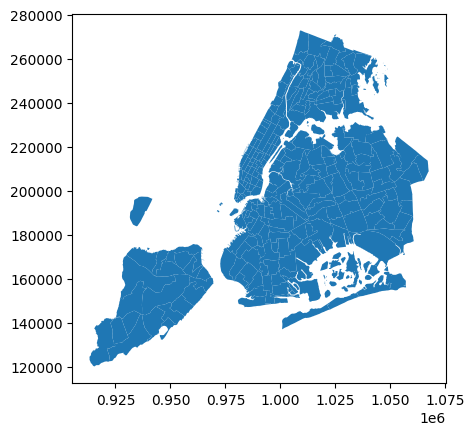

In [153]:
print(zones.info())
zones.plot()


Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [154]:
# Merge zones and trip records using locationID and PULocationID
df4 = pd.merge(
    zones,
    df3,
    left_on='LocationID',
    right_on='PULocationID',
    how='left'
)

df4.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 70206 entries, 0 to 70205
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   OBJECTID               70206 non-null  int32         
 1   Shape_Leng             70206 non-null  float64       
 2   Shape_Area             70206 non-null  float64       
 3   zone                   70206 non-null  object        
 4   LocationID             70206 non-null  int32         
 5   borough                70206 non-null  object        
 6   geometry               70206 non-null  geometry      
 7   VendorID               70071 non-null  float64       
 8   tpep_pickup_datetime   70071 non-null  datetime64[us]
 9   tpep_dropoff_datetime  70071 non-null  datetime64[us]
 10  passenger_count        70071 non-null  float64       
 11  trip_distance          70071 non-null  float64       
 12  RatecodeID             70071 non-null  float64      

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [157]:
# Group data by location and calculate the number of trips
pickup_trip_counts = df4.groupby('PULocationID').size().reset_index(name='pickup_trip_count')

pickup_trip_counts.info()
pickup_trip_counts.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PULocationID       127 non-null    float64
 1   pickup_trip_count  127 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 2.1 KB


PULocationID  pickup_trip_count
0           1.0                  1
1           4.0                 66
2           7.0                 14
3           8.0                  1
4          10.0                 16

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

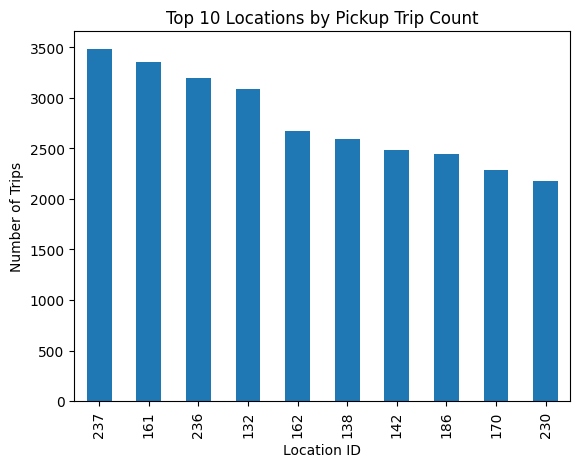

In [158]:
# Merge trip counts back to the zones GeoDataFrame
zones_merge=zones.merge(pickup_trip_counts, left_on='LocationID', right_on='PULocationID', how='left')
zones_merge['pickup_trip_count'] = zones_merge['pickup_trip_count'].fillna(0)
zones_merge = zones_merge.sort_values('pickup_trip_count', ascending=False)
zones_merge.head(10).plot(kind='bar', x='LocationID', y='pickup_trip_count', legend=False)
plt.title('Top 10 Locations by Pickup Trip Count')
plt.xlabel('Location ID')
plt.ylabel('Number of Trips')
plt.show()


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

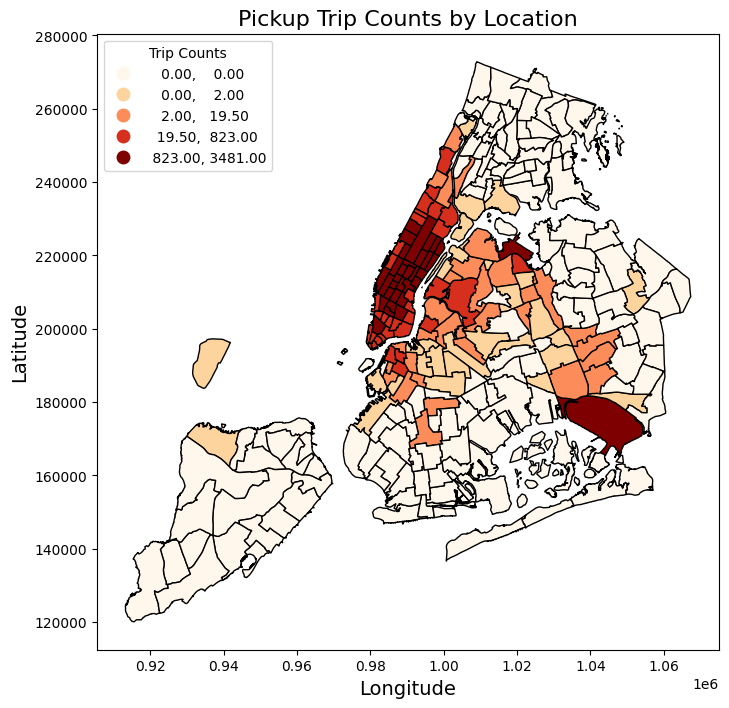

In [160]:
# Define figure and axis
zones_merge=gpd.GeoDataFrame(zones_merge, geometry='geometry')
zones_merge['pickup_trip_count']=zones_merge['pickup_trip_count'].astype(int)
zones_merge.plot(
    column='pickup_trip_count',  
    legend=True,
    legend_kwds = {'title': "Trip Counts", 'loc': "upper left" },
    classification_kwds={'k': 8},
    figsize=(12, 8),            
    cmap='OrRd', 
    scheme='quantiles',
    edgecolor='black',          
    linewidth=1               
)

# Plot the map and display it
plt.title('Pickup Trip Counts by Location', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)

plt.show()


In [170]:
# can you try displaying the zones DF sorted by the number of trips?
zones_merge['pickup_trip_count'].sort_values(ascending=False)


236    3481
160    3352
235    3192
131    3083
161    2674
       ... 
258       0
28        0
26        0
25        0
22        0
Name: pickup_trip_count, Length: 263, dtype: int32

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [172]:
# Find routes which have the slowest speeds at different times of the day
slow_routes_per_hour=df4.groupby(['hour','PULocationID','DOLocationID'])['trip_duration'].mean().reset_index()
slow_routes_per_hour=slow_routes_per_hour.sort_values(by=['hour','trip_duration'],ascending=[True,False])
slowest_by_hour=slow_routes_per_hour.groupby('hour').head(1)
slowest_by_hour


hour  PULocationID  DOLocationID  trip_duration
975     0.0         231.0         231.0      58.333333
1934    1.0         238.0         249.0    1396.200000
2283    2.0         132.0           1.0      47.483333
2899    3.0         161.0           1.0      42.833333
3294    4.0         211.0         144.0      63.100000
3464    5.0         132.0         142.0      58.550000
4077    6.0         230.0         236.0    1396.150000
4547    7.0         138.0          25.0      99.733333
6346    8.0         261.0         170.0     111.383333
6763    9.0         132.0          50.0      75.758333
8372   10.0         144.0         234.0    1435.600000
10535  11.0         262.0         229.0     480.433333
11621  12.0         186.0         265.0      94.066667
12600  13.0         132.0         170.0     134.121429
14500  14.0         158.0          33.0    1412.683333
16834  15.0         239.0          17.0    1424.450000
17312  16.0          88.0         151.0    1433.900000
19621  17.0         151.0         166.0     464.344444
22247  18.0         249.0         132.0    1430.183333
22610  19.0          87.0          79.0     475.766667
24873  20.0         142.0         152.0    1438.266667
26081  21.0          79.0         161.0     725.833333
27982  22.0          90.0          49.0    1436.750000
29971  23.0         132.0          79.0     367.341667

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

Busiest hour: 18.0 with 5111.0 trips


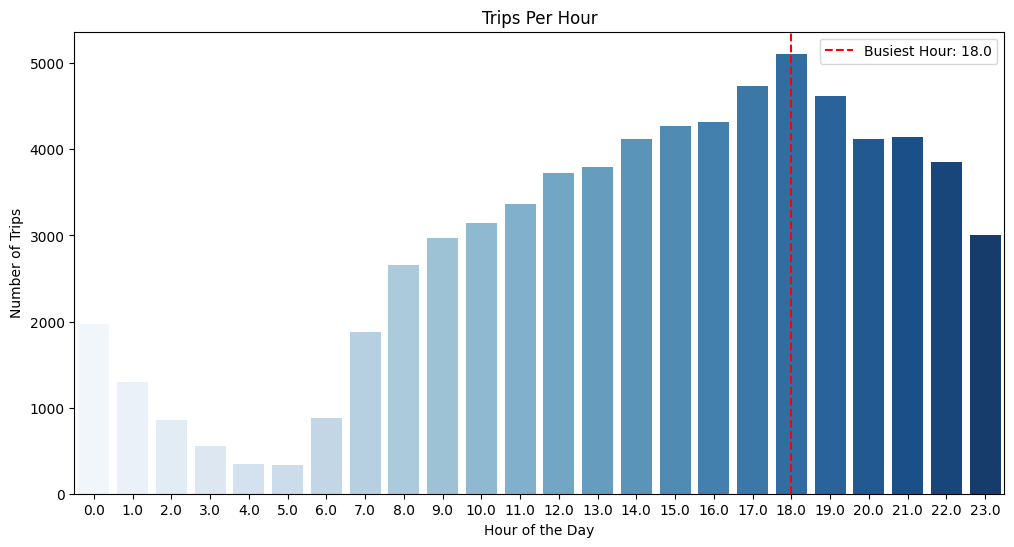

In [174]:
# Visualise the number of trips per hour and find the busiest hour
trips_per_hour = df4.groupby('hour').size().reset_index(name='trip_count')
busiest_hour = trips_per_hour.loc[trips_per_hour['trip_count'].idxmax()]
print(f"Busiest hour: {busiest_hour['hour']} with {busiest_hour['trip_count']} trips")
plt.figure(figsize=(12, 6))
sns.barplot(data=trips_per_hour, x='hour', y='trip_count', palette="Blues")

# Highlight busiest hour
plt.axvline(busiest_hour['hour'], color='red', linestyle='--', label=f"Busiest Hour: {busiest_hour['hour']}")

# Labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Trips Per Hour')
plt.legend()
plt.xticks(range(24))  # Ensure all hours are visible

plt.show()


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

Busiest hour: 18.0 with 102220.0 trips


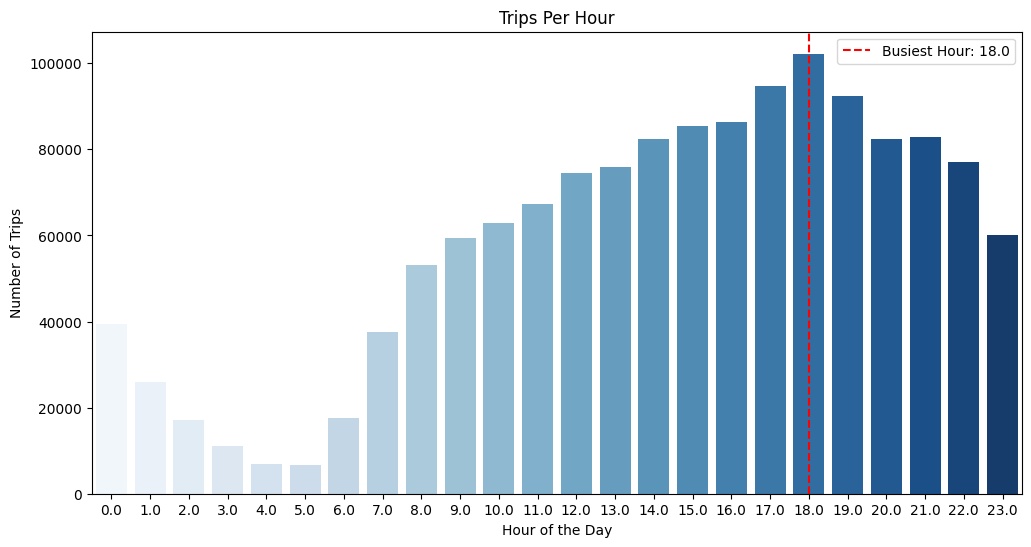

In [176]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction =.05
scaling_facter =1/sample_fraction
trips_per_hour = df4.groupby('hour').size().reset_index(name='trip_count')
trips_per_hour['actual_trip_count'] = trips_per_hour['trip_count'] * scaling_facter
busiest_hour = trips_per_hour.loc[trips_per_hour['actual_trip_count'].idxmax()]
print(f"Busiest hour: {busiest_hour['hour']} with {busiest_hour['actual_trip_count']} trips")
plt.figure(figsize=(12, 6))
sns.barplot(data=trips_per_hour, x='hour', y='actual_trip_count', palette="Blues")

plt.axvline(busiest_hour['hour'], color='red', linestyle='--', label=f"Busiest Hour: {busiest_hour['hour']}")

# Labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Trips Per Hour')
plt.legend()
plt.xticks(range(24))

plt.show()



**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

Busiest Weekday Hour: 18.0 with approx. 26300 trips
Busiest Weekend Hour: 18.0 with approx. 7773 trips


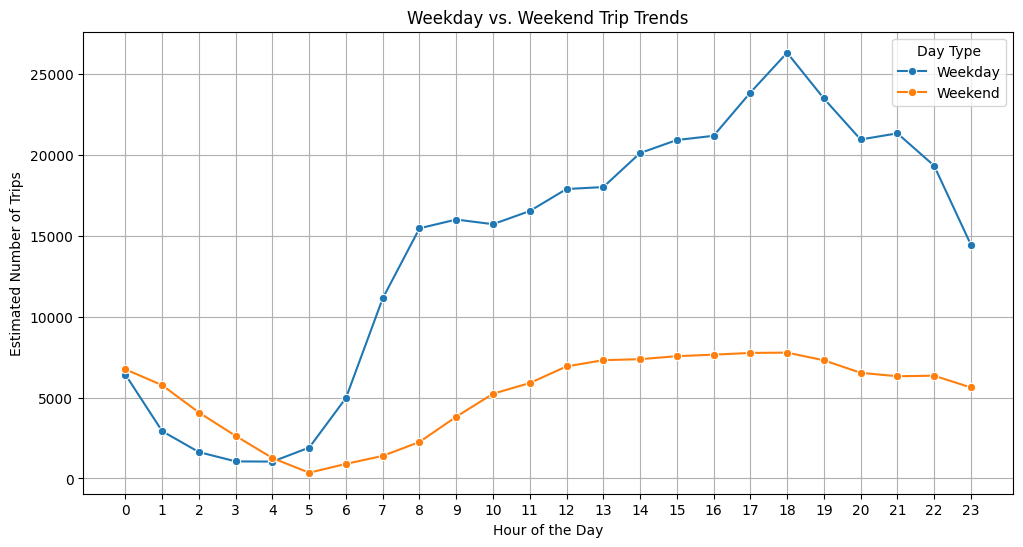

In [179]:
# Compare traffic trends for the week days and weekends
df4['day_type']=df4['tpep_pickup_datetime'].dt.weekday.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
trips_per_hour = df4.groupby(['day_type','hour']).size().reset_index(name='trip_count')
trips_per_hour['actual_trip_count'] = trips_per_hour['trip_count'] * scaling_facter

busiest_weekday = trips_per_hour[trips_per_hour['day_type'] == 'Weekday'].nlargest(1, 'actual_trip_count')
busiest_weekend = trips_per_hour[trips_per_hour['day_type'] == 'Weekend'].nlargest(1, 'actual_trip_count')

print(f"Busiest Weekday Hour: {busiest_weekday['hour'].values[0]} with approx. {int(busiest_weekday['actual_trip_count'].values[0])} trips")
print(f"Busiest Weekend Hour: {busiest_weekend['hour'].values[0]} with approx. {int(busiest_weekend['actual_trip_count'].values[0])} trips")

plt.figure(figsize=(12, 6))
sns.lineplot(data=trips_per_hour, x='hour', y='actual_trip_count', hue='day_type', marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Estimated Number of Trips')
plt.title('Weekday vs. Weekend Trip Trends')
plt.legend(title="Day Type")
plt.xticks(range(24))  
plt.grid()
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [184]:
df4_pickups.head()

OBJECTID_x  Shape_Leng_x  Shape_Area_x                   zone_x  \
0           1      0.116357      0.000782           Newark Airport   
1           2      0.433470      0.004866              Jamaica Bay   
2           3      0.084341      0.000314  Allerton/Pelham Gardens   
3           4      0.043567      0.000112            Alphabet City   
4           4      0.043567      0.000112            Alphabet City   

   LocationID_x  borough_x                                         geometry_x  \
0             1        EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1             2     Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2             3      Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3             4  Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4             4  Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0       2.0  2023-03-06 12:55:36   2023-03-06 12:55:55              2.0   
1       NaN                  NaT                   NaT              NaN   
2       NaN                  NaT                   NaT              NaN   
3       2.0  2023-01-08 00:13:33   2023-01-08 00:34:07              2.0   
4       2.0  2023-01-14 01:35:38   2023-01-14 01:55:31              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.05         5.0                  N           1.0           1.0   
1            NaN         NaN                NaN           NaN           NaN   
2            NaN         NaN                NaN           NaN           NaN   
3           5.35         1.0                  N           4.0         239.0   
4           4.46         1.0                  N           4.0         230.0   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0           1.0         92.0    0.0      0.0       22.80          21.0   
1           NaN          NaN    NaN      NaN         NaN           NaN   
2           NaN          NaN    NaN      NaN         NaN           NaN   
3           1.0         26.1    1.0      0.5        6.22           0.0   
4           1.0         24.0    1.0      0.5        5.80           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0        136.80                   0.0          NaN   
1                    NaN           NaN                   NaN          NaN   
2                    NaN           NaN                   NaN          NaN   
3                    1.0         37.32                   2.5          0.0   
4                    1.0         34.80                   2.5          0.0   

         date  hour  Airport_fee  week_Day  day_name  Month Month_name  \
0  2023-03-06  12.0          0.0       0.0    Monday    3.0        MAR   
1         NaN   NaN          NaN       NaN       NaN    NaN        NaN   
2         NaN   NaN          NaN       NaN       NaN    NaN        NaN   
3  2023-01-08   0.0          NaN       6.0    Sunday    1.0        JAN   
4  2023-01-14   1.0          NaN       5.0  Saturday    1.0        JAN   

   quarter_  quarter_plot  trip_duration Payment_type_name day_type  \
0       1.0           1.0       0.316667       Credit Card  Weekday   
1       NaN           NaN            NaN               NaN  Weekday   
2       NaN           NaN            NaN               NaN  Weekday   
3       1.0           1.0      20.566667       Credit Card  Weekend   
4       1.0           1.0      19.883333       Credit Card  Weekend   

   OBJECTID_y  Shape_Leng_y  Shape_Area_y          zone_y  LocationID_y  \
0         1.0      0.116357      0.000782  Newark Airport           1.0   
1         NaN           NaN           NaN             NaN           NaN   
2         NaN           NaN           NaN             NaN           NaN   
3         4.0      0.043567      0.000112   Alphabet City           4.0   
4         4.0 

In [185]:
# Find top 10 pickup and dropoff zones
#for Pickup
df4_pickups= df3.merge(zones, left_on="PULocationID", right_on="LocationID", how="left")
pickup_counts = df4_pickups.groupby(['PULocationID','zone']).size().reset_index(name='pickup_count')
top_10_pickup_zones = pickup_counts.nlargest(10, 'pickup_count')
print(top_10_pickup_zones)
top_10_pickup_zones_l =pickup_counts.nlargest(10, 'pickup_count')['PULocationID'].tolist()

#for Dropoff

df4_dropoff= df4.merge(zones, left_on="DOLocationID", right_on="LocationID", how="left")
dropoff_counts = df4_pickups.groupby(['DOLocationID','zone']).size().reset_index(name='dropoff_count')
top_10_droppoff_zones = dropoff_counts.nlargest(10, 'dropoff_count')
top_10_droppoff_zones_l= dropoff_counts.nlargest(10, 'dropoff_count')['DOLocationID'].tolist()
print(top_10_droppoff_zones)

filtered_ = df4_pickups[(df4_pickups['PULocationID'].isin(top_10_pickup_zones_l)) | (df4_dropoff['DOLocationID'].isin(top_10_droppoff_zones_l))]
hourly_pickups = filtered_.groupby(['hour', 'PULocationID','zone']).size().reset_index(name='pickup_count')
hourly_dropoffs = filtered_.groupby(['hour', 'DOLocationID','zone']).size().reset_index(name='dropoff_count')


     PULocationID                          zone  pickup_count
113           237         Upper East Side South          3481
72            161                Midtown Center          3352
112           236         Upper East Side North          3192
55            132                   JFK Airport          3083
73            162                  Midtown East          2674
58            138             LaGuardia Airport          2594
61            142           Lincoln Square East          2485
84            186  Penn Station/Madison Sq West          2448
78            170                   Murray Hill          2281
107           230     Times Sq/Theatre District          2179
      DOLocationID                   zone  dropoff_count
4333           236  Upper East Side South            533
4393           237  Upper East Side North            466
4332           236  Upper East Side North            324
4394           237  Upper East Side South            315
4378           237         Midtow

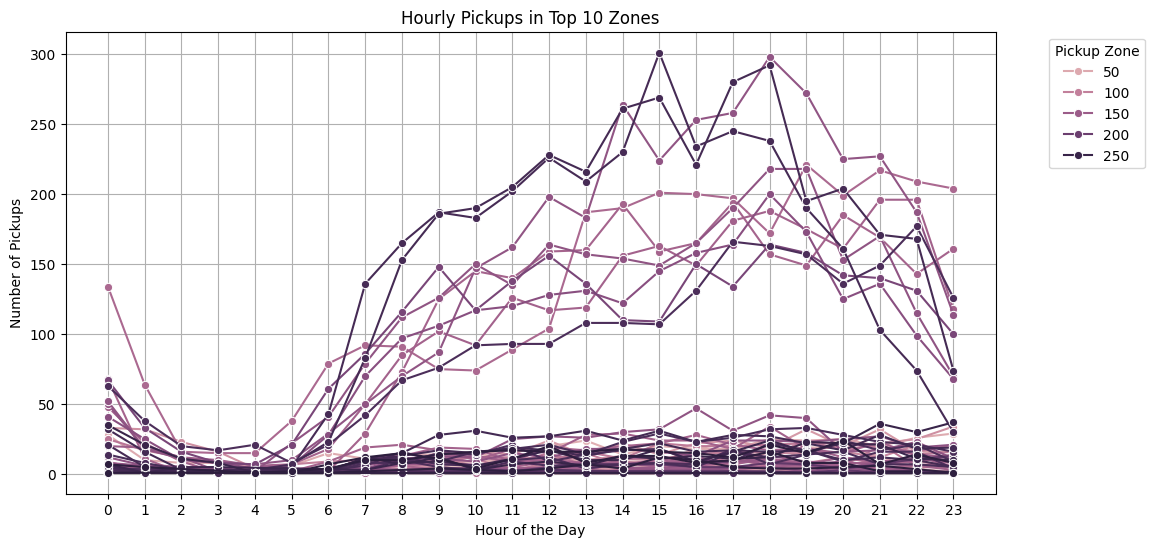

In [187]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_pickups, x='hour', y='pickup_count', hue='PULocationID', marker='o')

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.title('Hourly Pickups in Top 10 Zones')
plt.legend(title="Pickup Zone", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(24))
plt.grid()
plt.show()

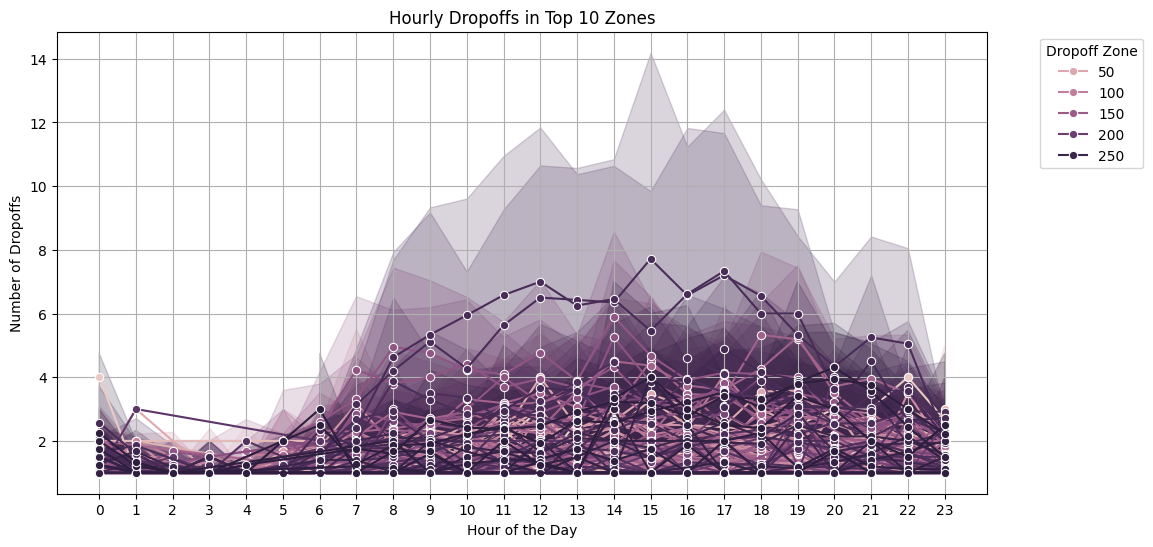

In [188]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_dropoffs, x='hour', y='dropoff_count', hue='DOLocationID', marker='o')

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Dropoffs')
plt.title('Hourly Dropoffs in Top 10 Zones')
plt.legend(title="Dropoff Zone", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(24))
plt.grid()
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [189]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_counts = df4_pickups.groupby(['PULocationID','zone']).size().reset_index(name='pickup_count')
dropoff_counts = df4_pickups.groupby(['DOLocationID','zone']).size().reset_index(name='dropoff_count')
zone_counts = pickup_counts.merge(dropoff_counts, left_on="zone", right_on="zone", how="outer").fillna(0)
zone_counts["pickup_drop_ratio"] = zone_counts["pickup_count"] / zone_counts["dropoff_count"]

top_10_highest = zone_counts.nlargest(10, "pickup_drop_ratio")
top_10_lowest = zone_counts.nsmallest(10, "pickup_drop_ratio")

print("Top 20 Highest Pickup/Dropoff Ratios:")
print(top_10_highest[["zone", "pickup_count", "dropoff_count", "pickup_drop_ratio"]])

print("\nTop 20 Lowest Pickup/Dropoff Ratios:")
print(top_10_lowest[["zone", "pickup_count", "dropoff_count", "pickup_drop_ratio"]])


Top 20 Highest Pickup/Dropoff Ratios:
                       zone  pickup_count  dropoff_count  pickup_drop_ratio
4427  Upper East Side South          3481              1             3481.0
4428  Upper East Side South          3481              1             3481.0
4434  Upper East Side South          3481              1             3481.0
4437  Upper East Side South          3481              1             3481.0
4438  Upper East Side South          3481              1             3481.0
4439  Upper East Side South          3481              1             3481.0
4440  Upper East Side South          3481              1             3481.0
4448  Upper East Side South          3481              1             3481.0
4452  Upper East Side South          3481              1             3481.0
4458  Upper East Side South          3481              1             3481.0

Top 20 Lowest Pickup/Dropoff Ratios:
                     zone  pickup_count  dropoff_count  pickup_drop_ratio
52           A

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [190]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

df4_pickups_dropoff= df3.merge(zones, left_on="PULocationID", right_on="LocationID", how="left").rename(columns={"zone": "pickup_zone"})
df4_pickups_dropoff= df4_pickups_dropoff.merge(zones, left_on="DOLocationID", right_on="LocationID", how="left").rename(columns={"zone": "dropoff_zone"})
night_hours = df4_pickups_dropoff[(df4_pickups_dropoff['hour'] >= 23) | (df4_pickups_dropoff['hour'] <= 5)]
night_pickup_counts = night_hours.groupby("pickup_zone").size().reset_index(name="pickup_count")
night_dropoff_counts = night_hours.groupby("dropoff_zone").size().reset_index(name="dropoff_count")

top_10_night_pickups = night_pickup_counts.nlargest(10, "pickup_count")
top_10_night_dropoffs = night_dropoff_counts.nlargest(10, "dropoff_count")
print("Top 10 Pickup Zones (Night Hours):")
print(top_10_night_pickups)
print("\nTop 10 Dropoff Zones (Night Hours):")
print(top_10_night_dropoffs)


Top 10 Pickup Zones (Night Hours):
                     pickup_zone  pickup_count
25                  East Village           647
90                  West Village           569
40                   JFK Airport           486
15                  Clinton East           444
52               Lower East Side           415
36       Greenwich Village South           381
79     Times Sq/Theatre District           293
67  Penn Station/Madison Sq West           252
44             LaGuardia Airport           247
60                 Midtown South           246

Top 10 Dropoff Zones (Night Hours):
              dropoff_zone  dropoff_count
56            East Village            363
77                Gramercy            266
99         Lenox Hill West            255
31            Clinton East            249
123            Murray Hill            245
47            East Chelsea            217
174  Upper West Side South            217
190         Yorkville West            210
180           West Village       

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [192]:
# Filter for night hours (11 PM to 5 AM)
night_trip_time = df4[(df4['hour'] >= 23) | (df4['hour'] <= 5)]
day_trip_time =df4[(df4['hour'] >= 5) & (df4['hour'] < 23)]
nighttime_revenue = night_trip_time['fare_amount'].sum()
daytime_revenue = day_trip_time['fare_amount'].sum()
total_revenue = nighttime_revenue + daytime_revenue
night_trip_revenue_share = (nighttime_revenue / total_revenue) * 100
day_trip_revenue_share = (daytime_revenue / total_revenue) * 100

print(f"Nighttime Revenue Share: {night_trip_revenue_share:.2f}%")
print(f"Daytime Revenue Share: {day_trip_revenue_share:.2f}%")


Nighttime Revenue Share: 12.07%
Daytime Revenue Share: 87.93%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

   passenger_count  fare_per_mile  fare_per_mile_per_passenger
0              0.0       8.220931                          inf
1              1.0       9.358557                     9.358557
2              2.0      12.248514                     6.124257
3              3.0       7.962821                     2.654274
4              4.0       8.695068                     2.173767
5              5.0      10.218978                     2.043796
6              6.0       7.850675                     1.308446


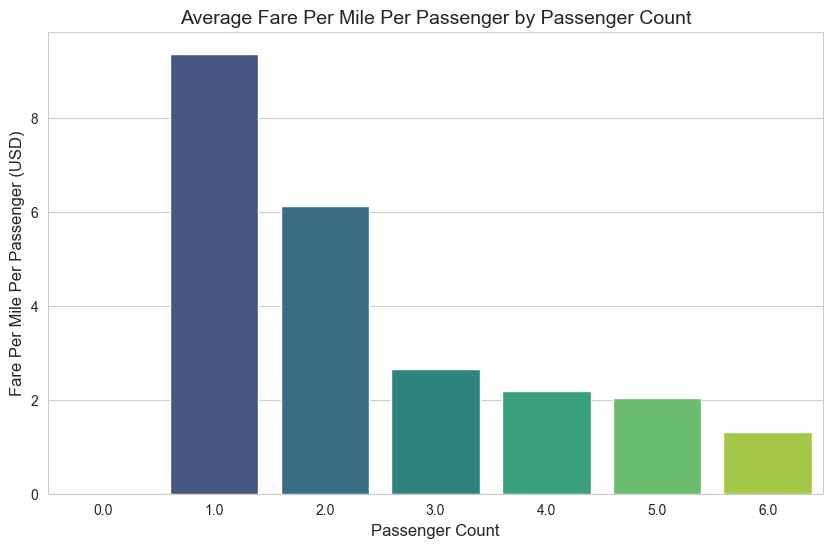

In [193]:
# Analyse the fare per mile per passenger for different passenger counts
df4['fare_per_mile'] = df4['fare_amount'] / df4['trip_distance']
avg_fare_per_mile = df4.groupby('passenger_count')['fare_per_mile'].mean().reset_index()
avg_fare_per_mile['fare_per_mile_per_passenger'] = avg_fare_per_mile['fare_per_mile'] / avg_fare_per_mile['passenger_count']
print(avg_fare_per_mile)
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_fare_per_mile, x="passenger_count", y="fare_per_mile_per_passenger", palette="viridis")
plt.xlabel("Passenger Count", fontsize=12)
plt.ylabel("Fare Per Mile Per Passenger (USD)", fontsize=12)
plt.title("Average Fare Per Mile Per Passenger by Passenger Count", fontsize=14)
plt.xticks(rotation=0)
plt.show()



**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

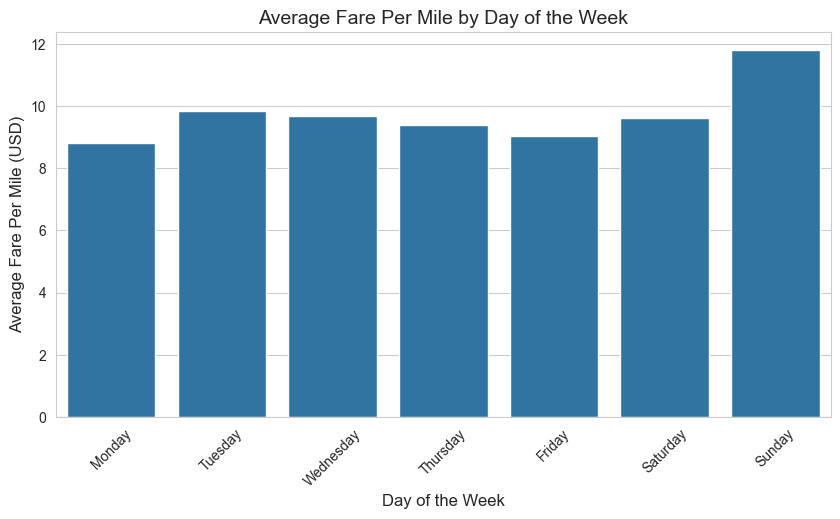

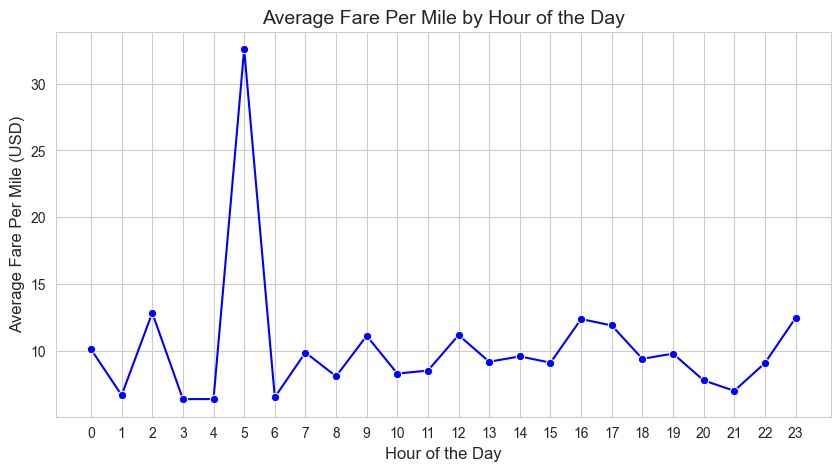

In [197]:
# Compare the average fare per mile for different days and for different times of the day
avg_fare_per_mile_by_day = df4.groupby("week_Day")["fare_per_mile"].mean().reset_index()
avg_fare_per_mile_by_day["week_Day"]=avg_fare_per_mile_by_day["week_Day"].astype(int)
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
avg_fare_per_mile_by_day["week_Day"] = avg_fare_per_mile_by_day["week_Day"].map(lambda x: days[x])
plt.figure(figsize=(10, 5))
sns.barplot(data=avg_fare_per_mile_by_day, x="week_Day", y="fare_per_mile")

# Labels & Title
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Average Fare Per Mile (USD)", fontsize=12)
plt.title("Average Fare Per Mile by Day of the Week", fontsize=14)
plt.xticks(rotation=45)


avg_fare_per_mile_by_hour =df4.groupby("hour")["fare_per_mile"].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=avg_fare_per_mile_by_hour, x="hour", y="fare_per_mile", marker="o", color="b")
# sns.scatterplot(data=avg_fare_per_mile_by_hour, x="hour", y="fare_per_mile", color="b", marker="o")


# Labels & Title
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Average Fare Per Mile (USD)", fontsize=12)
plt.title("Average Fare Per Mile by Hour of the Day", fontsize=14)
plt.xticks(range(0, 24))

plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

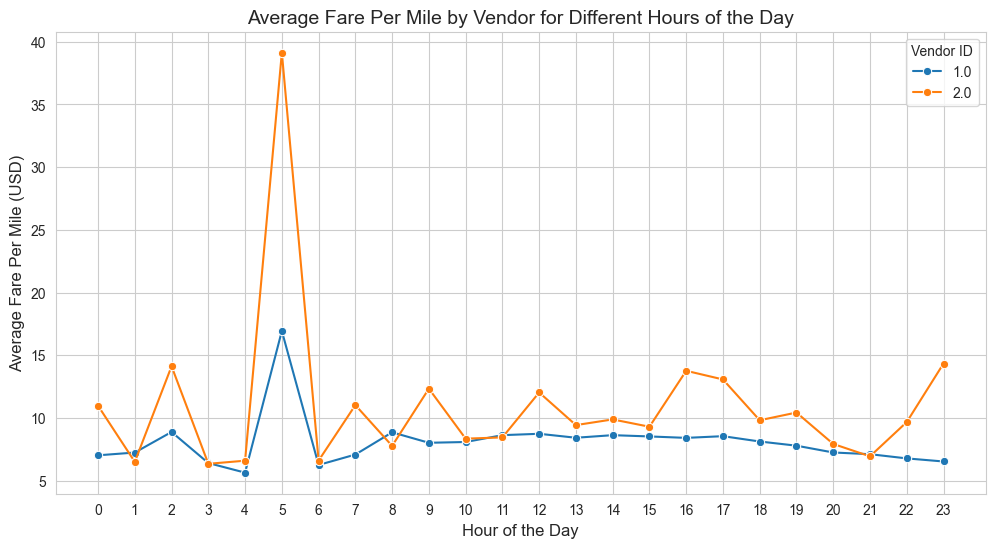

In [199]:
# Compare fare per mile for different vendors
avg_fare_per_mile_by_vendor = df4.groupby(["VendorID", "hour"])["fare_per_mile"].mean().reset_index()
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_fare_per_mile_by_vendor, x="hour", y="fare_per_mile", hue="VendorID", marker="o", palette="tab10")

plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Average Fare Per Mile (USD)", fontsize=12)
plt.title("Average Fare Per Mile by Vendor for Different Hours of the Day", fontsize=14)
plt.xticks(range(0, 24))

plt.legend(title="Vendor ID")

plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


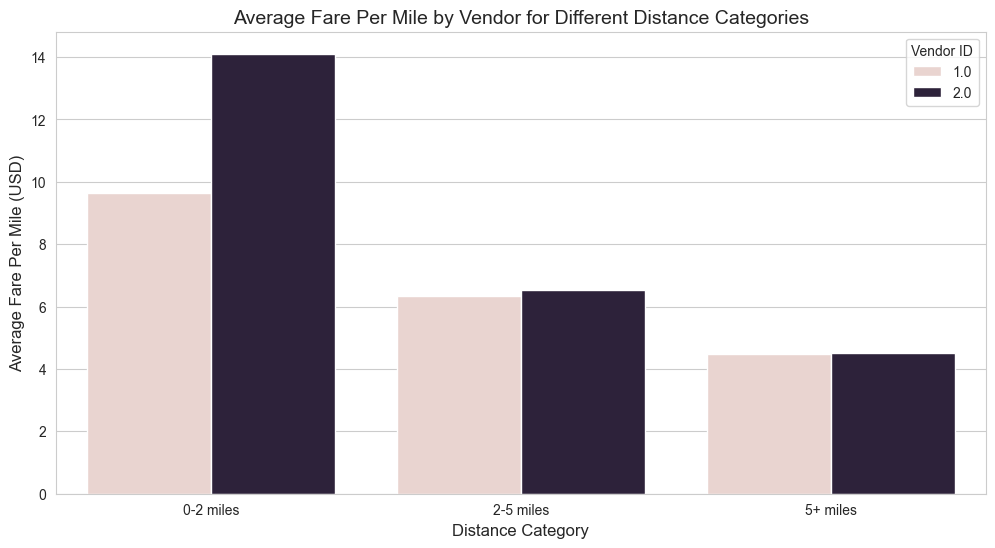

In [201]:
# Defining distance tiers
def distance_tier(dist):
    if dist <= 2:
        return "0-2 miles"
    elif dist <= 5:
        return "2-5 miles"
    else:
        return "5+ miles"


df4['distance_category'] = df4['trip_distance'].apply(distance_tier)
avg_fare_by_vendor = df4.groupby(["VendorID", "distance_category"])["fare_per_mile"].mean().reset_index()
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_fare_by_vendor, x="distance_category", y="fare_per_mile", hue="VendorID")
plt.xlabel("Distance Category", fontsize=12)
plt.ylabel("Average Fare Per Mile (USD)", fontsize=12)
plt.title("Average Fare Per Mile by Vendor for Different Distance Categories", fontsize=14)
plt.legend(title="Vendor ID")
plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

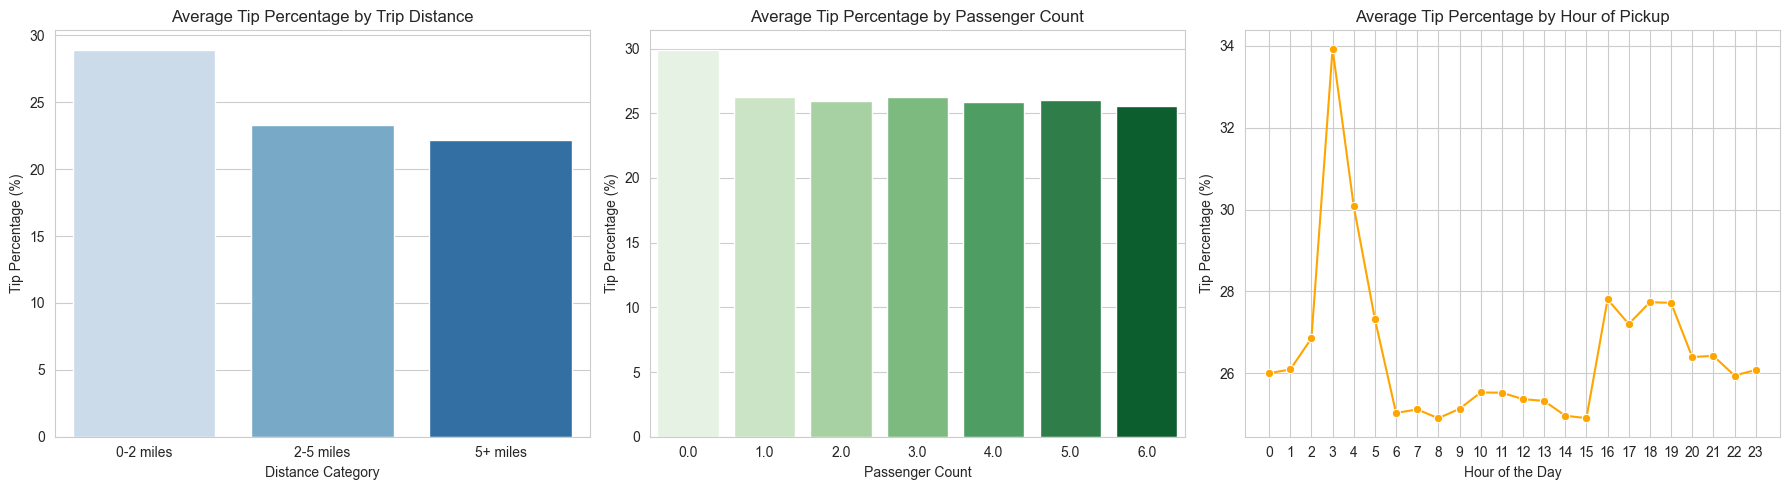

In [222]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
df4['tip_percentage'] = (df4['tip_amount'] / df4['fare_amount']) * 100
avg_tip_by_distance = df4.groupby("distance_category")["tip_percentage"].mean().reset_index()
avg_tip_by_passenger = df4.groupby("passenger_count")["tip_percentage"].mean().reset_index()
avg_tip_by_hour = df4.groupby("hour")["tip_percentage"].mean().reset_index()
sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

#We will perform 3 types of comparison here. with Distance, Passenger count and time of Pickup.

sns.barplot(data=avg_tip_by_distance, x="distance_category", y="tip_percentage", palette="Blues", ax=axes[0])
axes[0].set_title("Average Tip Percentage by Trip Distance")
axes[0].set_xlabel("Distance Category")
axes[0].set_ylabel("Tip Percentage (%)")

sns.barplot(data=avg_tip_by_passenger, x="passenger_count", y="tip_percentage", palette="Greens", ax=axes[1])
axes[1].set_title("Average Tip Percentage by Passenger Count")
axes[1].set_xlabel("Passenger Count")
axes[1].set_ylabel("Tip Percentage (%)")

sns.lineplot(data=avg_tip_by_hour, x="hour", y="tip_percentage", marker="o", color="orange", ax=axes[2])
axes[2].set_title("Average Tip Percentage by Hour of Pickup")
axes[2].set_xlabel("Hour of the Day")
axes[2].set_ylabel("Tip Percentage (%)")
axes[2].set_xticks(range(0, 24))
plt.tight_layout()
plt.show()


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [224]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
low_tips = df4[df4['tip_percentage'] < 10]
high_tips = df4[df4['tip_percentage'] > 25]
avg_distance_low = low_tips['trip_distance'].mean()
avg_distance_high = high_tips['trip_distance'].mean()

print(f"Average Trip Distance - Low Tip (<10%): {avg_distance_low:.2f} miles")
print(f"Average Trip Distance - High Tip (>25%): {avg_distance_high:.2f} miles")

avg_fare_low = low_tips['fare_amount'].mean()
avg_fare_high = high_tips['fare_amount'].mean()

print(f"Average Fare Amount - Low Tip (<10%): ${avg_fare_low:.2f}")
print(f"Average Fare Amount - High Tip (>25%): ${avg_fare_high:.2f}")

avg_passengers_low = low_tips['passenger_count'].mean()
avg_passengers_high = high_tips['passenger_count'].mean()

print(f"Average Passenger Count - Low Tip (<10%): {round(avg_passengers_low)}")
print(f"Average Passenger Count - High Tip (>25%): {round(avg_passengers_high)}")


Average Trip Distance - Low Tip (<10%): 4.86 miles
Average Trip Distance - High Tip (>25%): 2.29 miles
Average Fare Amount - Low Tip (<10%): $26.07
Average Fare Amount - High Tip (>25%): $14.35
Average Passenger Count - Low Tip (<10%): 1
Average Passenger Count - High Tip (>25%): 1


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [232]:
# df4.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         4    0.043567    0.000112            Alphabet City           4   

     borough                                           geometry  VendorID  \
0        EWR  POLYGON ((933100.918 192536.086, 933091.011 19...       2.0   
1     Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...       NaN   
2      Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...       NaN   
3  Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...       2.0   
4  Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...       2.0   

  tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0  2023-03-06 12:55:36   2023-03-06 12:55:55              2.0           0.05   
1                  NaT                   NaT              NaN            NaN   
2                  NaT                   NaT              NaN            NaN   
3  2023-01-08 00:13:33   2023-01-08 00:34:07              2.0           5.35   
4  2023-01-14 01:35:38   2023-01-14 01:55:31              1.0           4.46   

   RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  payment_type  \
0         5.0                  N           1.0           1.0           1.0   
1         NaN                NaN           NaN           NaN           NaN   
2         NaN                NaN           NaN           NaN           NaN   
3         1.0                  N           4.0         239.0           1.0   
4         1.0                  N           4.0         230.0           1.0   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0         92.0    0.0      0.0       22.80          21.0   
1          NaN    NaN      NaN         NaN           NaN   
2          NaN    NaN      NaN         NaN           NaN   
3         26.1    1.0      0.5        6.22           0.0   
4         24.0    1.0      0.5        5.80           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0        136.80                   0.0          NaN   
1                    NaN           NaN                   NaN          NaN   
2                    NaN           NaN                   NaN          NaN   
3                    1.0         37.32                   2.5          0.0   
4                    1.0         34.80                   2.5          0.0   

         date  hour  Airport_fee  week_Day  day_name  Month Month_name  \
0  2023-03-06  12.0          0.0       0.0    Monday    3.0        MAR   
1         NaN   NaN          NaN       NaN       NaN    NaN        NaN   
2         NaN   NaN          NaN       NaN       NaN    NaN        NaN   
3  2023-01-08   0.0          NaN       6.0    Sunday    1.0        JAN   
4  2023-01-14   1.0          NaN       5.0  Saturday    1.0        JAN   

   quarter_  quarter_plot  trip_duration Payment_type_name day_type  \
0       1.0           1.0       0.316667       Credit Card  Weekday   
1       NaN           NaN            NaN               NaN  Weekday   
2       NaN           NaN            NaN               NaN  Weekday   
3       1.0           1.0      20.566667       Credit Card  Weekend   
4       1.0           1.0      19.883333       Credit Card  Weekend   

   fare_per_mile distance_category  tip_percentage  
0    1840.000000         0-2 miles       24.782609  
1            NaN          5+ miles             NaN  
2            NaN          5+ miles             NaN  
3       4.878505          5+ miles       23.831418  
4       5.381166         2-5 miles       24.166667

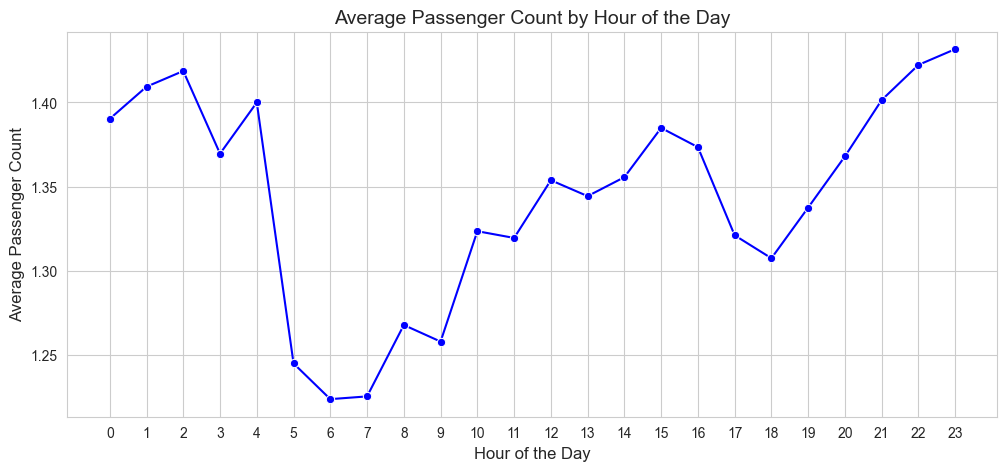

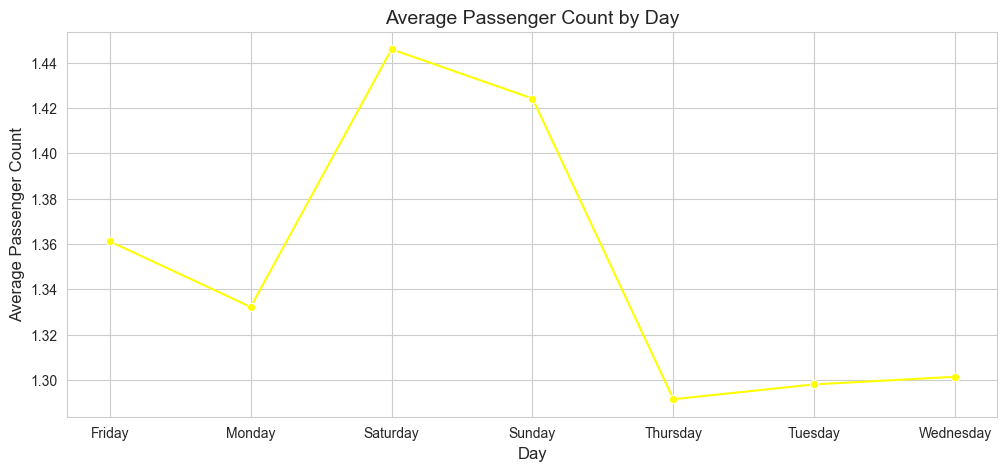

In [236]:
# See how passenger count varies across hours and days

avg_passengers_per_hour = df4.groupby("hour")["passenger_count"].mean().reset_index()
plt.figure(figsize=(12, 5))
sns.lineplot(data=avg_passengers_per_hour, x="hour", y="passenger_count", marker="o", color="blue")

plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Average Passenger Count", fontsize=12)
plt.title("Average Passenger Count by Hour of the Day", fontsize=14)
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

avg_passengers_per_days = df4.groupby("day_name")["passenger_count"].mean().reset_index()
plt.figure(figsize=(12, 5))
sns.lineplot(data=avg_passengers_per_hour, x=avg_passengers_per_days["day_name"], y=avg_passengers_per_days["passenger_count"], marker="o", color="yellow")

plt.xlabel("Day", fontsize=12)
plt.ylabel("Average Passenger Count", fontsize=12)
plt.title("Average Passenger Count by Day", fontsize=14)
# plt.xticks(range(0, 24))
plt.grid(True)
plt.show()



**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

     OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0           1    0.116357    0.000782           Newark Airport           1   
1           2    0.433470    0.004866              Jamaica Bay           2   
2           3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3           4    0.043567    0.000112            Alphabet City           4   
4           5    0.092146    0.000498            Arden Heights           5   
..        ...         ...         ...                      ...         ...   
258       259    0.126750    0.000395       Woodlawn/Wakefield         259   
259       260    0.133514    0.000422                 Woodside         260   
260       261    0.027120    0.000034       World Trade Center         261   
261       262    0.049064    0.000122           Yorkville East         262   
262       263    0.037017    0.000066           Yorkville West         263   

           borough                                           ge

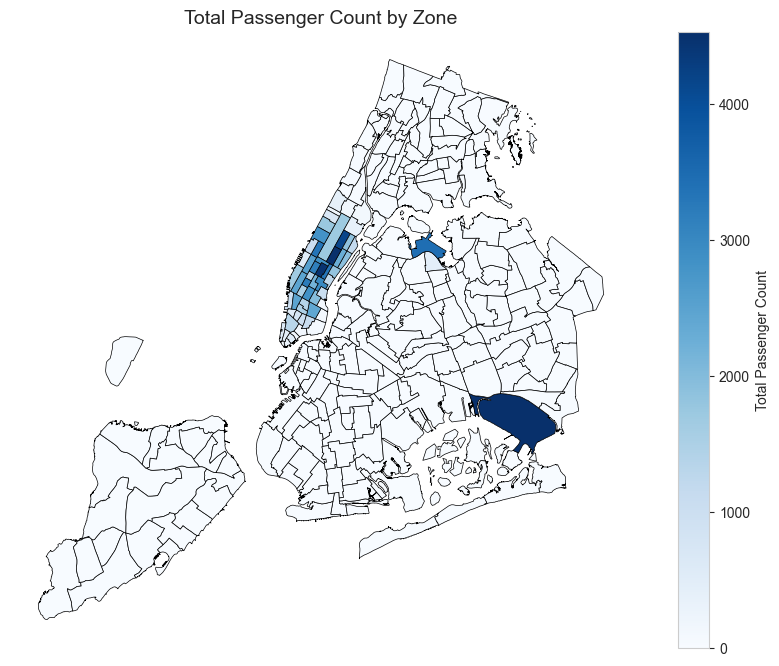

In [238]:
# How does passenger count vary across zones
passengers_by_zone = df4.groupby("PULocationID")["passenger_count"].sum().reset_index()
zones_passengers = zones.merge(passengers_by_zone, left_on="LocationID", right_on="PULocationID", how="left")

zones_passengers["passenger_count"] = zones_passengers["passenger_count"].fillna(0)
print(zones_passengers)
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
zones_passengers.plot(column="passenger_count", cmap="Blues", linewidth=0.5, edgecolor="black", 
                      legend=True, legend_kwds={"label": "Total Passenger Count"}, ax=ax)

ax.set_title("Total Passenger Count by Zone", fontsize=14)
ax.axis("off")
plt.show()


In [244]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
avg_passengers_by_zone = df4.groupby("PULocationID")["passenger_count"].mean().reset_index()
df5 = zones.merge(avg_passengers_by_zone, left_on="LocationID", right_on="PULocationID", how="left")
df5["avg_passenger_count"] = df5["passenger_count"].fillna(0)
df5 = df5.drop(columns=["passenger_count"])

In [247]:
df5.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   PULocationID  avg_passenger_count  
0           1.0             2.000000  
1           NaN             0.000000  
2           NaN             0.000000  
3           4.0             1.454545  
4           NaN             0.000000

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

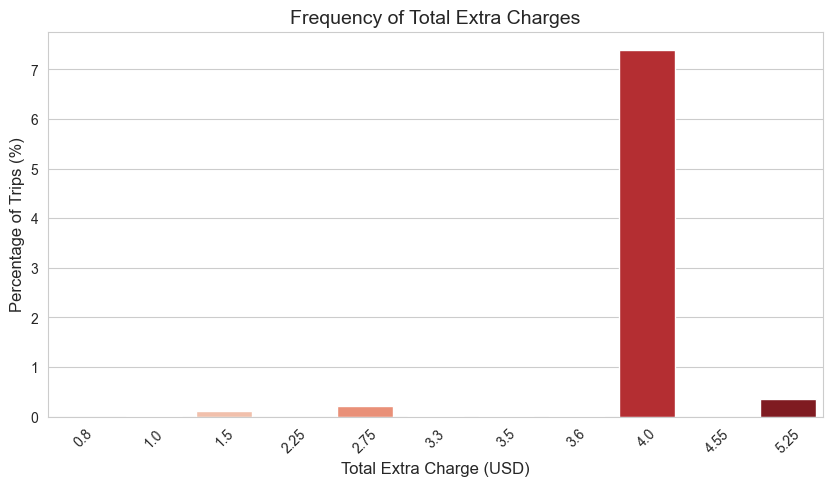

In [250]:
# How often is each surcharge applied?

df4["total_extra"] = df4["mta_tax"] + df4["congestion_surcharge"] + df4["airport_fee"] +df4["improvement_surcharge"]
total_extra_counts = df4["total_extra"].value_counts().reset_index()
total_extra_counts.columns = ["total_extra_charge", "count"]
total_extra_counts["total_extra_charge"]=total_extra_counts["total_extra_charge"].round(2)
total_extra_counts["percentage"] = (total_extra_counts["count"] / df4.shape[0]) * 100
# print(total_extra_counts)

plt.figure(figsize=(10, 5))
sns.barplot(data=total_extra_counts, x="total_extra_charge", y="percentage", palette="Reds")
plt.xlabel("Total Extra Charge (USD)", fontsize=12)
plt.ylabel("Percentage of Trips (%)", fontsize=12)
plt.title("Frequency of Total Extra Charges", fontsize=14)
plt.xticks(rotation=45)
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
o	High-demand pickup spots: Upper East Side South, Midtown Center, Upper East Side North, JFK Airport, Midtown East.
o	More Number of Taxis should be positioned in these locations to reduce waiting times.
o	More Taxi should be allocated during peak demand hours.

o	Most drop-offs happen in East Village, Clinton East, Murray Hill East and Chelsea.
o	These areas have high rider availability. Allocate more cabs to pick up-dominant areas.
o	Reposition drivers to pick up hotspots after drop-offs.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
o	More Taxi should be allocated during peak demand hours.
o	Can initiate surge charge when demand > supply to attract drivers.
o	Demand is seen greater during weekends, allocate more drivers during these days.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
o	The correlation between total fare and number of passengers are less, this shouldnt be the case. 
o	Customers should be changed based on the number of passengers.
o	Choose less congested routes to avoid traffic and commute time